# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_group_size'
time_path = 'data/time/compare_group_size_2020_12_13_23_49_24.npy'
cost_path = 'data/cost/compare_group_size_2020_12_13_23_49_24.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(4, 18, step=2)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(21,) (21,)
Wall time: 2 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(7, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      7 non-null      float64
 1   approx      7 non-null      float64
 2   approx_woc  7 non-null      float64
 3   size        7 non-null      int32  
dtypes: float64(3), int32(1)
memory usage: 324.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000000,0.120382,0.058184,4
1,0.000000,0.253731,0.055441,6
2,0.000000,0.571940,0.056162,8
3,0.000000,0.839824,0.054442,10
4,0.000004,1.739359,0.052221,12
5,0.000000,5.114401,0.056437,14
6,0.000000,31.669110,0.083628,16


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(7, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      7 non-null      float64
 1   approx      7 non-null      float64
 2   approx_woc  7 non-null      float64
 3   size        7 non-null      int32  
dtypes: float64(3), int32(1)
memory usage: 324.0 bytes
None


,greedy,approx,approx_woc,size
0,10636.8,9429.1,9345.6,4
1,10636.8,9150.3,9345.6,6
2,10636.8,9154.8,9345.6,8
3,10636.8,9258.7,9345.6,10
4,10636.8,8902.2,9345.6,12
5,10636.8,8968.6,9345.6,14
6,10636.8,8823.4,9345.6,16


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy        5.714286e-07
approx        5.758392e+00
approx_woc    5.950223e-02
size          1.000000e+01
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,10636.8,9429.1,9345.6,4,1.128082,1.138161
1,10636.8,9150.3,9345.6,6,1.162454,1.138161
2,10636.8,9154.8,9345.6,8,1.161882,1.138161
3,10636.8,9258.7,9345.6,10,1.148844,1.138161
4,10636.8,8902.2,9345.6,12,1.194851,1.138161
5,10636.8,8968.6,9345.6,14,1.186005,1.138161
6,10636.8,8823.4,9345.6,16,1.205522,1.138161


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.169663
approx_woc_gain    1.138161
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        10636.800000
approx         9098.157143
approx_woc     9345.600000
dtype: float64

# Plots

## Processing time

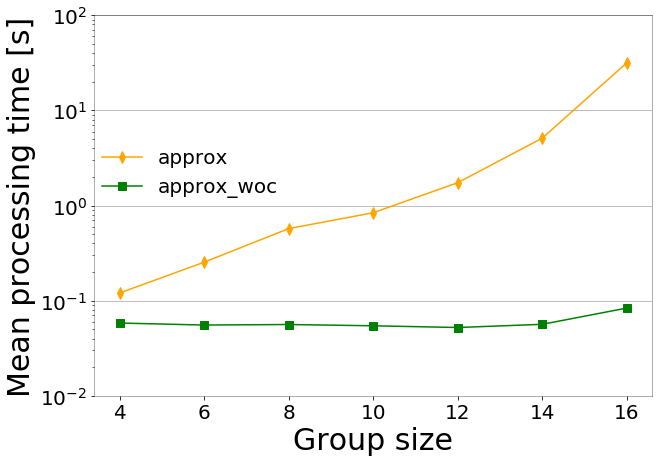

In [10]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**2), 
    xlabel='Group size'
)

## Travel cost

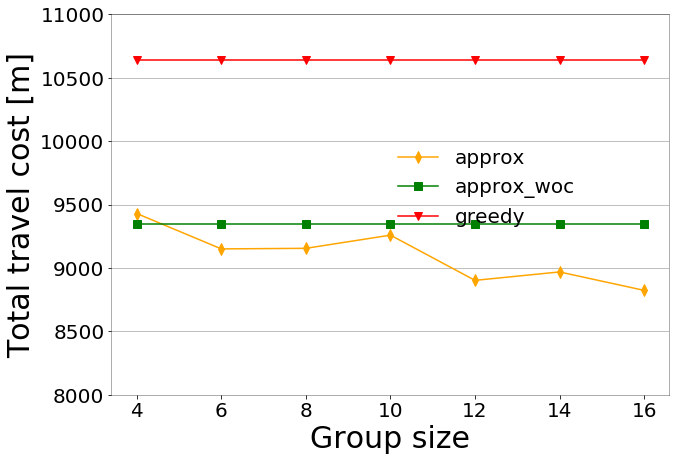

In [11]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(8000,11000), 
    xlabel='Group size', 
    legend_loc=(0.5, 0.42)
)

## Ride-sharing efficiency

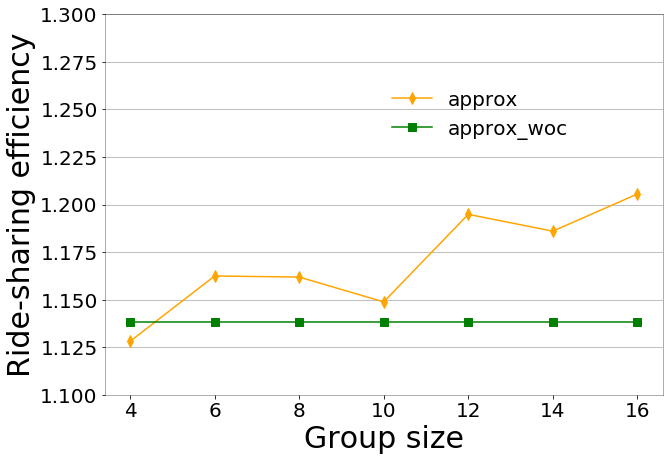

In [12]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.1,1.3), 
    xlabel='Group size', 
    legend_loc=(0.5, 0.65)
)